# Regressão logística

Determinar se um usuário comprou uma SUV baseado em sua idade e estimativa salarial

Dataset obtido no Kaggle (https://www.kaggle.com/hamzaalijoiyah/users-of-a-social-networks-who-bought-suv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dados.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


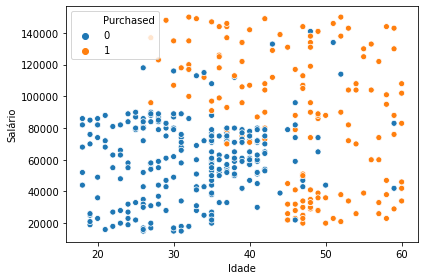

In [4]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=dados,hue='Purchased')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.tight_layout()

A coluna ID do usuário não é relevante e será removida

In [5]:
dados = dados.drop('User ID',axis=1)

In [6]:
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Informações iniciais da amostra

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


Verificando a existência de NaNs

In [8]:
dados.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Determinando número de clientes homens ou mulher

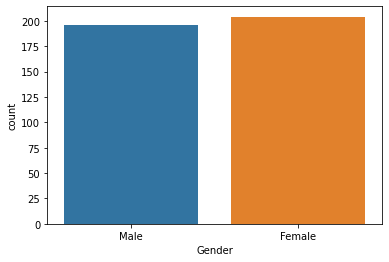

In [9]:
sns.countplot(x='Gender',data=dados)

Verificando distribuição das idades

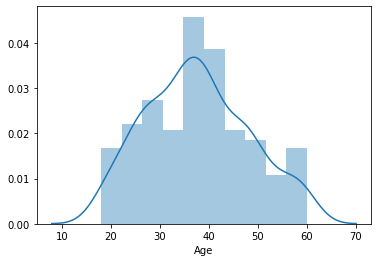

In [10]:
sns.distplot(dados['Age'])

Verificando distribuição da renda

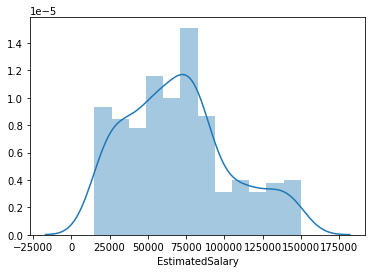

In [11]:
sns.distplot(dados['EstimatedSalary'])

Verificando quantidade de clientes quem compraram ou não SUV

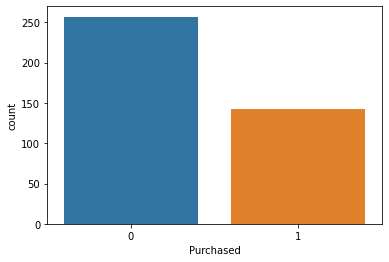

In [12]:
sns.countplot(x='Purchased',data=dados)

A coluna genero (Gender) precisa ser transformada de variável categórica para variável numérica

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
le.fit(dados['Gender'])

LabelEncoder()

In [16]:
list(le.classes_)

['Female', 'Male']

In [17]:
dados['Gender'] = le.transform(dados['Gender'])

In [18]:
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


Normalizando os dados dos salários

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc_X=StandardScaler()

In [21]:
dados[['Age','EstimatedSalary']] = sc_X.fit_transform(dados[['Age','EstimatedSalary']])

In [22]:
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0


Separando as variáveis X e Y

In [23]:
X = dados.drop('Purchased',axis=1).values
Y = dados['Purchased'].values

Separando dados em amostras de treino e teste

In [24]:
from sklearn.model_selection import train_test_split
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

Aplicando modelo de regressão logística

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
modelo = LogisticRegression()

In [27]:
modelo.fit(X_treino,Y_treino)

LogisticRegression()

Realizando previsão na amostra de teste

In [28]:
Y_previsto = modelo.predict(X_teste)

Determinando a matriz de confusão para verificar eficácio do modelo

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm=confusion_matrix(Y_teste,Y_previsto)

In [31]:
cm

array([[65,  3],
       [ 7, 25]])

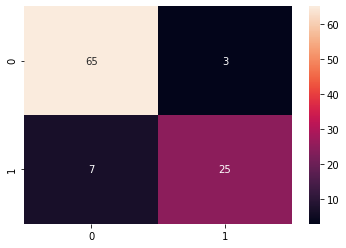

In [32]:
sns.heatmap(cm,annot=True, fmt="d")

Calculando as métricas do modelo

In [33]:
from sklearn.metrics import classification_report,f1_score,precision_score,average_precision_score,recall_score,accuracy_score

Relatório de classificação

In [34]:
cr = classification_report(Y_teste,Y_previsto,labels=[0,1])
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



F1-score

In [35]:
f1 = f1_score(Y_teste,Y_previsto)
print("F1 score = {:0.2f}%".format(f1*100))

F1 score = 83.33%


Precision score

In [36]:
precisao = precision_score(Y_teste,Y_previsto)
print("Precision score = {:0.2f}%".format(precisao*100))

Precision score = 89.29%


Average precision score

In [37]:
avg_precision = average_precision_score(Y_teste,Y_previsto)
print("Averaged Precision score = {:0.2f}%".format(avg_precision*100))

Averaged Precision score = 76.75%


Recall score

In [38]:
rec = recall_score(Y_teste,Y_previsto)
print("Recall score = {:0.2f}%".format(rec*100))

Recall score = 78.12%


Accuracy score

In [39]:
acc = accuracy_score(Y_teste,Y_previsto)
print("Accuracy score = {:0.2f}%".format(acc*100))

Accuracy score = 90.00%


# Curva ROC

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

In [41]:
roc_score = roc_auc_score(Y_teste, Y_previsto)
print("ROC score = {:0.2f}%".format(roc_score*100))

ROC score = 86.86%


In [42]:
roc_fpr, roc_tpr, _ = roc_curve(Y_teste, Y_previsto)

Text(0, 0.5, 'True Positive Rate')

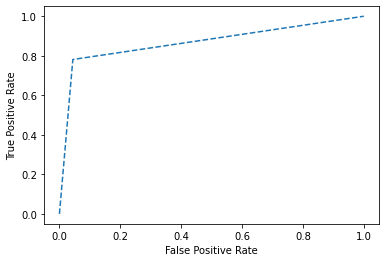

In [43]:
plt.plot(roc_fpr, roc_tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Curva Precision-Recall

In [44]:
from sklearn.metrics import precision_recall_curve,auc

In [45]:
lr_precision, lr_recall, _ = precision_recall_curve(Y_teste, Y_previsto)
lr_auc = auc(lr_recall, lr_precision)

In [46]:
print("AUC score = {:0.2f}%".format(lr_auc*100))

AUC score = 87.21%


Text(0, 0.5, 'Precision')

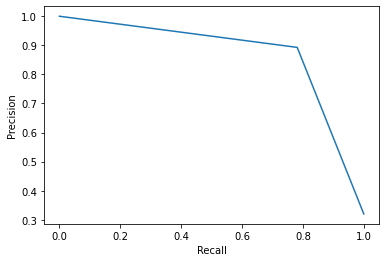

In [47]:
plt.plot(lr_recall, lr_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')